In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer

In [2]:

#https://dacon.io/codeshare/1877
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
country_map = {}

for i, c in enumerate(train['country'].unique()):
    country_map[c] = i
    

In [4]:
train['country'] = train['country'].map(country_map)
test['country'] = test['country'].map(country_map) #country열 Mapping

In [5]:
test = test.fillna(0)
train = train.fillna(0)#test 결측치 0으로 채우기

In [6]:

x_train = train.loc[:, 'Q1':'ASD']
y_train = train['nerdiness']
x_test = test.loc[:, 'Q1':'ASD'] #index와 nerdiness열 제외


In [7]:
train[train['age']>100]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1739,1739,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4002,4002,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4976,4976,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,...,2.0,545,1.0,2.0,1.0,1.0,2.0,4.0,2.0,0
6725,6725,1.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,...,1.0,722,2.0,2.0,1.0,1.0,2.0,3.0,2.0,0
9273,9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,...,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0,1
14135,14135,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,...,2.0,336,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1


In [8]:
test[test['age']>100]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
2578,2578,5.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,1.0,1.0,116,3.0,2.0,4.0,2.0,1.0,2.0,2.0
2802,2802,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,2.0,374,1.0,12.0,3.0,2.0,2.0,3.0,1.0
4609,4609,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,...,2.0,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0
8190,8190,2.0,2.0,4.0,2.0,3.0,2.0,2.0,5.0,2.0,...,2.0,1.0,809,1.0,2.0,1.0,2.0,1.0,1.0,2.0
8625,8625,4.0,4.0,4.0,3.0,3.0,3.0,3.0,5.0,3.0,...,2.0,2.0,1997,1.0,10.0,0.0,2.0,1.0,3.0,2.0
11922,11922,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,...,1.0,2.0,545,1.0,2.0,1.0,1.0,2.0,4.0,2.0
13943,13943,3.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,3.0,...,2.0,2.0,155,1.0,10.0,1.0,2.0,1.0,2.0,2.0
17311,17311,5.0,3.0,5.0,4.0,4.0,3.0,5.0,4.0,3.0,...,2.0,2.0,1999,1.0,10.0,0.0,2.0,1.0,5.0,2.0
24301,24301,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,2.0,374,1.0,12.0,3.0,2.0,2.0,3.0,1.0
26070,26070,5.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,1.0,1.0,116,3.0,2.0,4.0,2.0,1.0,2.0,2.0


index


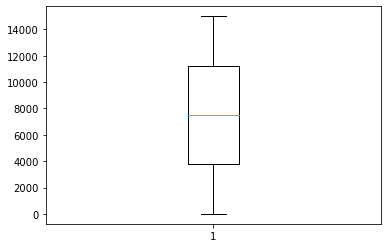

Q1


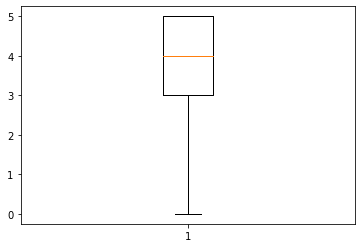

Q2


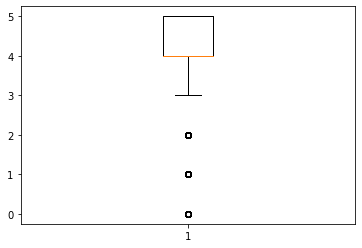

Q3


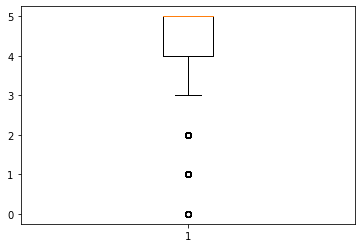

Q4


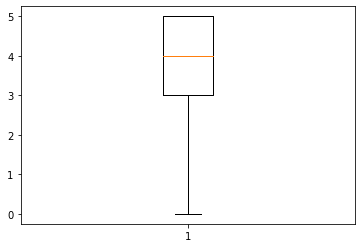

Q5


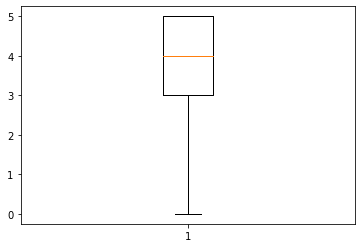

Q6


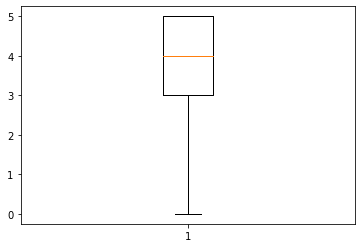

Q7


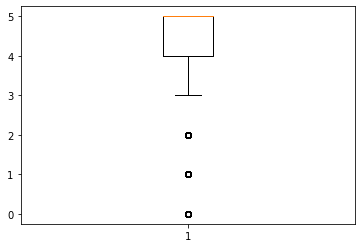

Q8


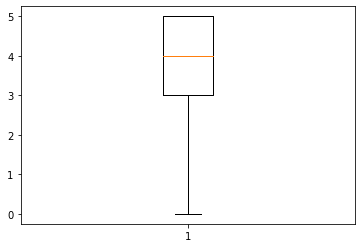

Q9


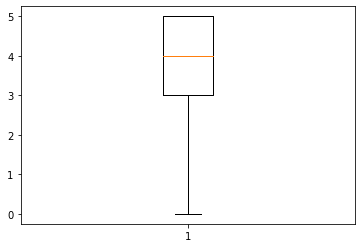

Q10


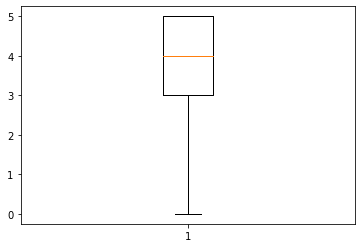

Q11


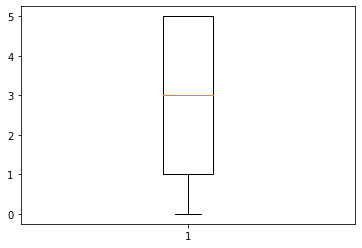

Q12


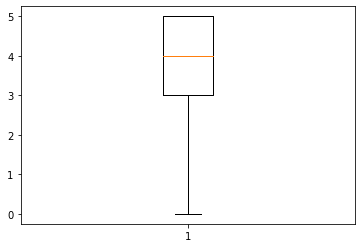

Q13


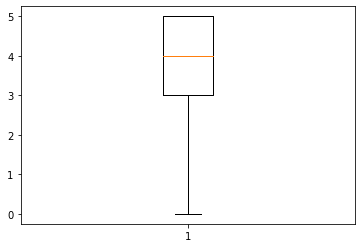

Q14


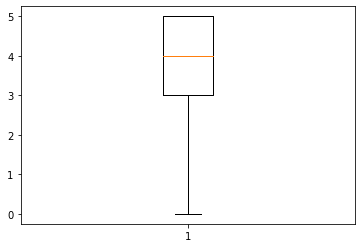

Q15


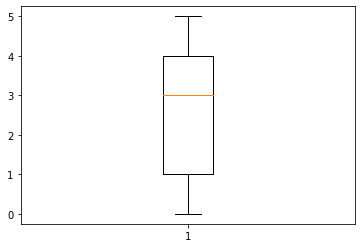

Q16


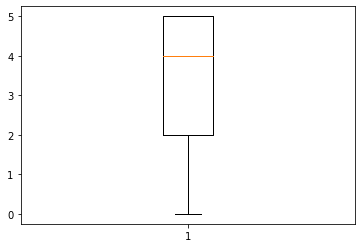

Q17


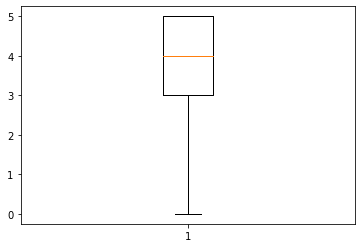

Q18


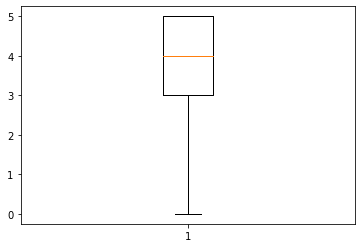

Q19


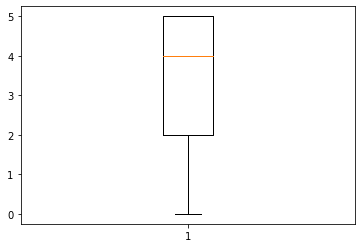

Q20


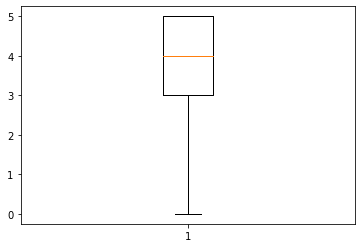

Q21


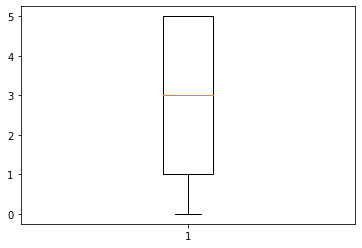

Q22


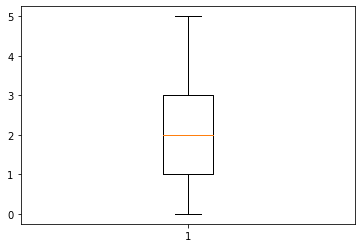

Q23


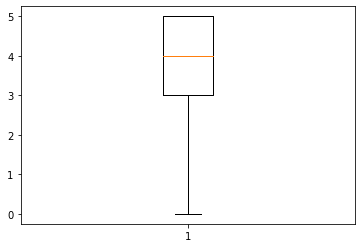

Q24


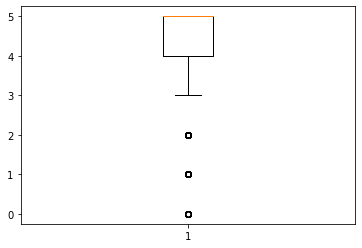

Q25


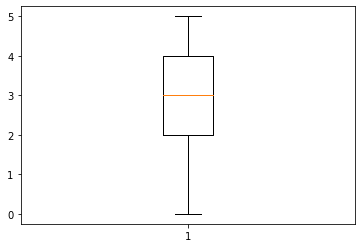

Q26


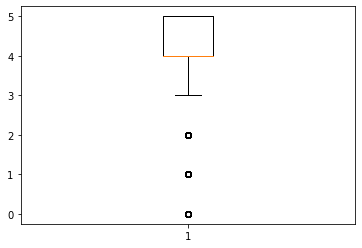

country


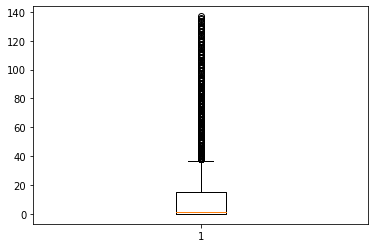

introelapse


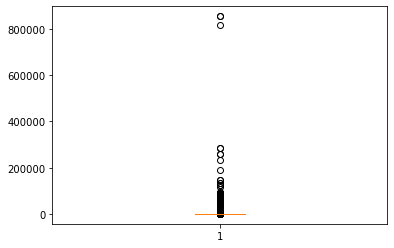

testelapse


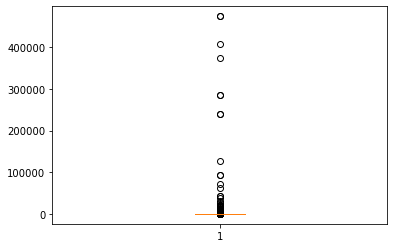

surveyelapse


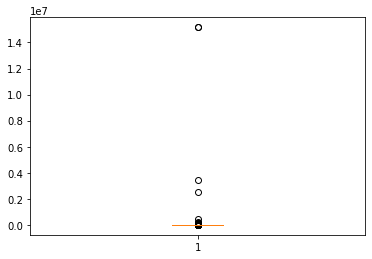

TIPI1


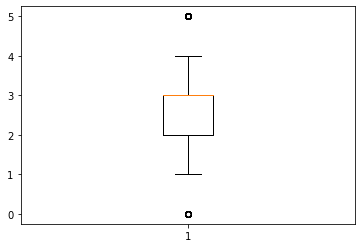

TIPI2


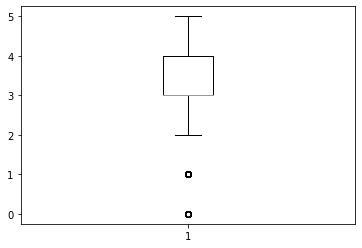

TIPI3


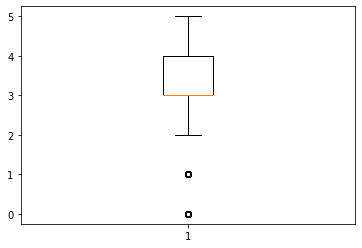

TIPI4


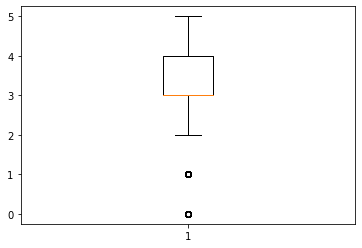

TIPI5


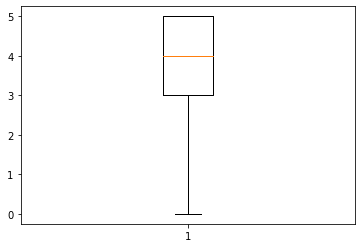

TIPI6


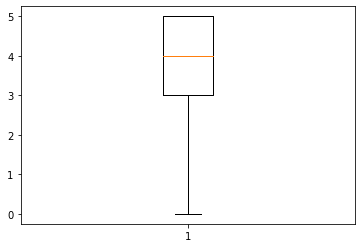

TIPI7


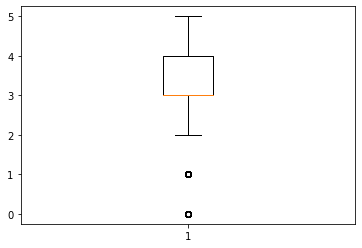

TIPI8


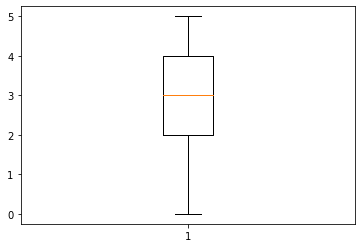

TIPI9


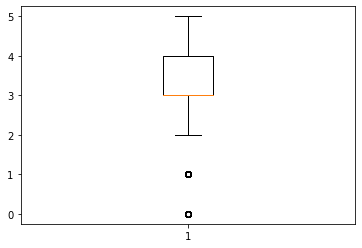

TIPI10


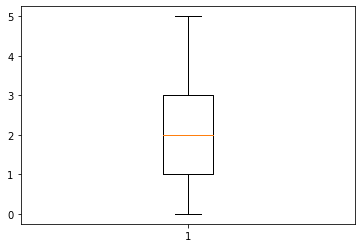

VCL1


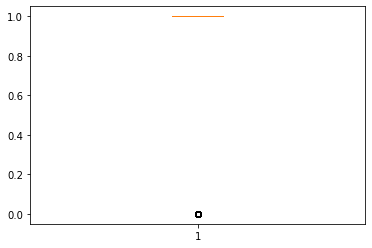

VCL2


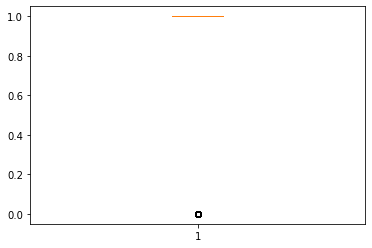

VCL3


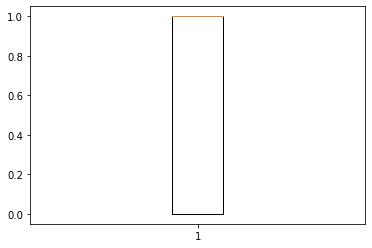

VCL4


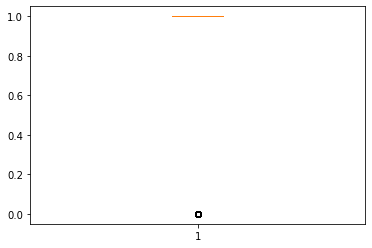

VCL5


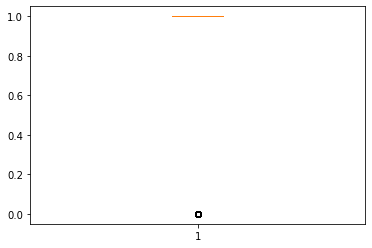

VCL6


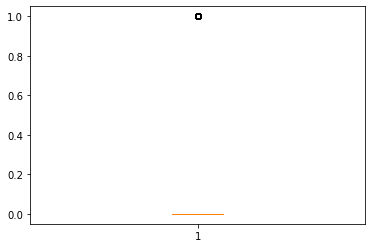

VCL7


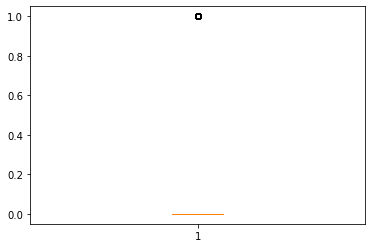

VCL8


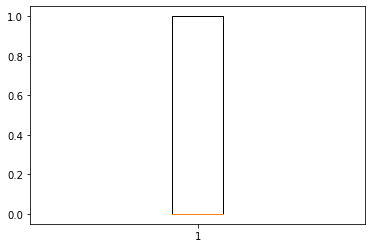

VCL9


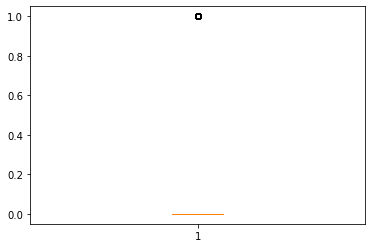

VCL10


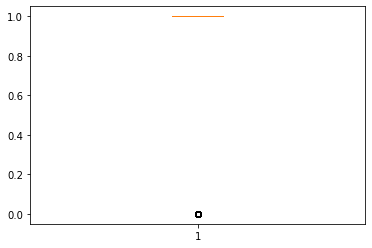

VCL11


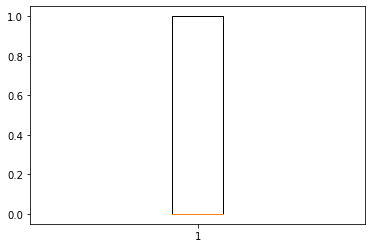

VCL12


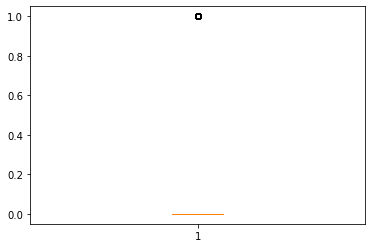

VCL13


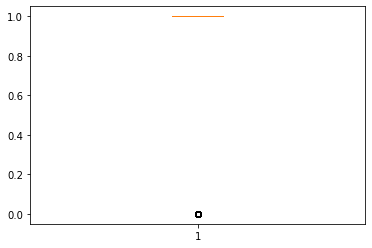

VCL14


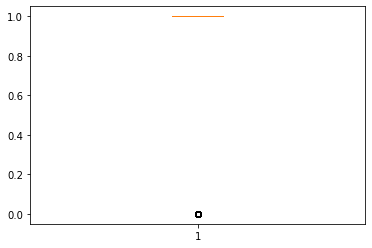

VCL15


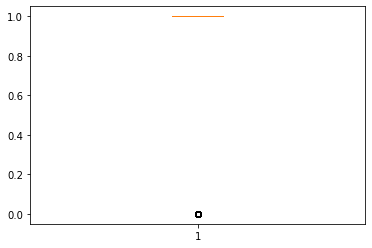

VCL16


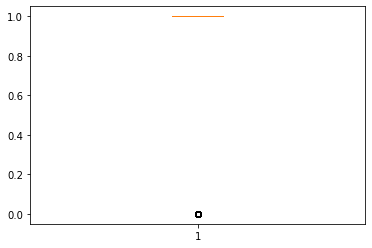

education


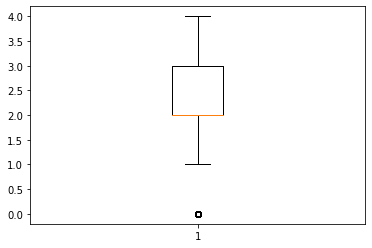

urban


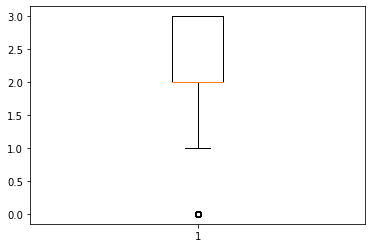

gender


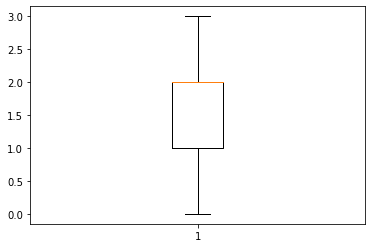

engnat


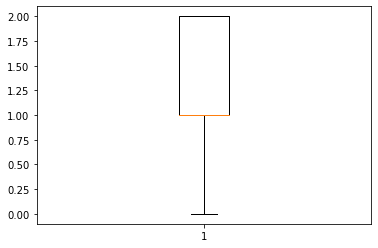

age


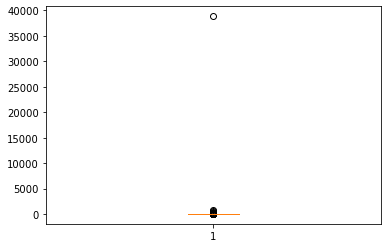

hand


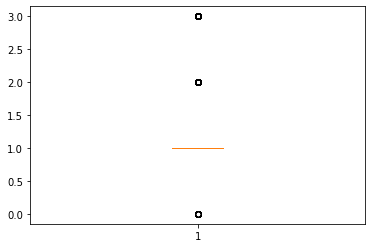

religion


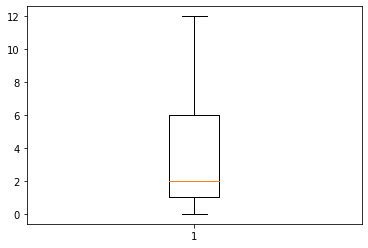

orientation


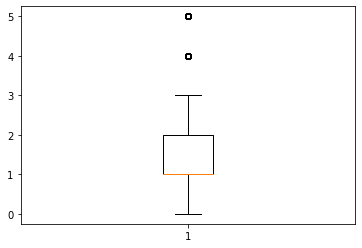

voted


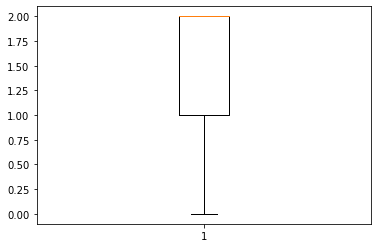

married


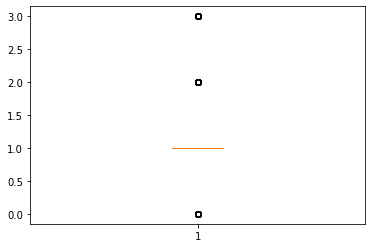

familysize


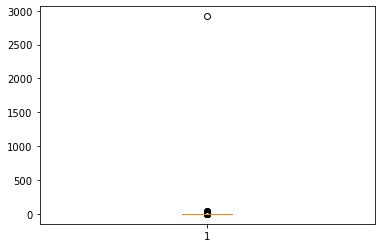

ASD


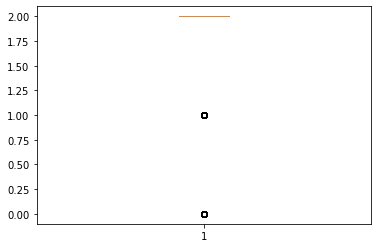

nerdiness


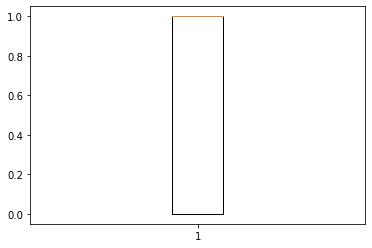

In [9]:

col=train.columns.tolist()
col
for i in col:
    print(i)
    plt.boxplot(train[[i]])
    plt.show()

In [10]:
mean=int(train['age'].mean())
index=train[train['age']>110].index

for i in index:
    train.at[i,'age']=mean
train['age'].unique()

array([ 20,  49,  43,  17,  18,  26,  40,  34,  29,  24,  13,  14,  16,
        19,  15,  23,  32,  22,  25,  27,  33,  41,  21,  50,  64,  44,
        31,  35,  67,  48,  38,  46,  58,  59,  52,  42,  37,  55,  36,
        45,  28,  47,  30,  39,  54,  53,  69,  57,  72,  51,  56,  65,
        60,  61, 100,  66,  73,  70,  68,  62,  71,  78,  76,  63,  74,
        88,  75,  77,  99,  81,  80])

array([ 4.,  2.,  1.,  3.,  5.,  0.,  8.,  6., 23., 13.,  7., 10., 39.,
        9., 12., 14., 19., 16., 11., 17.])